In [ ]:
!pip install nlpaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 6.1 MB/s eta 0:00:00


In [ ]:
import nlpaug.augmenter.sentence as nas
import pandas as pd
import nltk

nltk.download('punkt')

# sub512=pd.read_pickle("./sub512.pkl")
# sub512_antim = sub512[sub512['label']==1]
# sub512_antim=sub512_antim.reset_index(drop=True)

# text=sub512_antim['translated_text'][0]
# # Random Augmenter - Sentence level
# aug = nas.RandomSentAug()
# augmented_text = aug.augment(text)
# print(augmented_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

creiamo una funzione che aggiunga testi a partire da quelli antimeridionalisti

In [ ]:
validation=pd.read_pickle("./validation.pkl")

validation['label'].value_counts()

,count
label,
1.0,31


In [ ]:
!pip install dacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 669.5/669.5 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.8/197.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 60.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


In [ ]:
!pip install augmenty[all]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd

In [ ]:
# df = pd.read_pickle("./sub512.pkl") #apri il df dal file salvato dfgeo
# texts=sub512["translated_text"].tolist()
texts=validation["translated_text"].tolist()

In [ ]:
import augmenty

In [ ]:
import spacy
from spacy.lang.en import English
nlp = spacy.load("en_core_web_sm")
augmenter = augmenty.load("wordnet_synonym_v1", level=0.1)
texts = ["I love desserts and sweet food especially chocolate ones like fudge or brownies"]
list(augmenty.texts(texts, augmenter, nlp))

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


['I love desserts and sweet solid_food especially chocolate ones like fudge or brownies']

In [ ]:
cased_nlp = English()
cased_augmenter = augmenty.load("random_starting_case_v1", level=0.5)
texts = "one two three"
l=list(augmenty.texts(texts, augmenter, nlp))
aug_text=l[0]

In [ ]:
aug_text

'one two three'

In [ ]:
synonym_nlp = spacy.load("en_core_web_sm")
synonym_augmenter = augmenty.load("wordnet_synonym_v1", level=0.15)
texts = ["I love desserts and sweet food especially chocolate ones like fudge or brownies"]
list(augmenty.texts(texts, synonym_augmenter, synonym_nlp))

['I love desserts and sweet food especially chocolate ones like fudge or brownie']

In [ ]:
import nlpaug.augmenter.sentence as nas
import spacy
from spacy.lang.en import English
import augmenty

def ampliare_testi(df):
  texts=df["translated_text"].tolist()
  augmented_texts=texts.copy()
  cased_nlp = English()
  cased_augmenter = augmenty.load("random_starting_case_v1", level=0.5)
  synonym_nlp = spacy.load("en_core_web_sm")
  synonym_augmenter = augmenty.load("wordnet_synonym_v1", level=0.15)
  sentence_augmenter = nas.RandomSentAug()


  for text in texts:
    for i in [0,1,2]:
      #calcolo il testo modificato con delle iniziali maiuscole
      l1=list(augmenty.texts(text, cased_augmenter, cased_nlp))
      cased_text=l1[0]
      #calcolo il testo modificato con i sinonimi
      l2=list(augmenty.texts(text, synonym_augmenter, synonym_nlp))
      synonym_text=l2[0]
      #calcolo del testo modificato a livello della frase
      sentence_text=sentence_augmenter.augment(text)
      augmented_texts.append(cased_text)
      augmented_texts.append(synonym_text)
      augmented_texts.append(sentence_text[0])
  return augmented_texts



In [ ]:
augmented_texts=ampliare_testi(validation)

In [ ]:
len(augmented_texts)

310

In [ ]:
link = ['augmented' for i in range(len(augmented_texts))]
text=['' for i in range(len(augmented_texts))]
labels = [1 for i in range(len(augmented_texts))]
textlen=[-1 for i in range(len(augmented_texts))]

# dictionary of lists
dict = {'link': link, 'text': text, 'label': labels, 'textlen':textlen, 'translated_text':augmented_texts}

validation_augmented = pd.DataFrame(dict)

validation_augmented

,link,text,label,textlen,translated_text
0,augmented,,1,-1,"LECCE - Puglia ""has become a gay mecca"": this ..."
1,augmented,,1,-1,"February 23, 2024 a\n\na\n\na\n\n""We all know ..."
2,augmented,,1,-1,"February 23, 2024 a\n\na\n\na\n\n""Frankly, I k..."
3,augmented,,1,-1,"Claudio Brigliadori February 18, 2024 a\n\na\n..."
4,augmented,,1,-1,"February 17, 2024 a\n\na\n\na\n\n""She's ugly, ..."
...,...,...,...,...,...
305,augmented,,1,-1,"Yet another telephone cozenage, this meter wit..."
306,augmented,,1,-1,"[Yet another telephone scam, this time with a ..."
307,augmented,,1,-1,"Yet another telephone Scam, this time with A h..."
308,augmented,,1,-1,"Yet another telephone cozenage, this time with..."


In [ ]:
validation_augmented.to_pickle("./validation_augmented.pkl")  # salva il df nel file aug_df (estensione .pkl)


In [ ]:
df0 = pd.read_pickle("./df0.pkl") #apri il df dal file salvato dfgeo


In [ ]:
import nlpaug.augmenter.sentence as nas
import spacy
from spacy.lang.en import English
import augmenty

def ampliare2(df):
  texts=df["translated_text"].tolist()
  augmented_texts=texts.copy()
  cased_nlp = English()
  cased_augmenter = augmenty.load("random_starting_case_v1", level=0.5)
  synonym_nlp = spacy.load("en_core_web_sm")
  synonym_augmenter = augmenty.load("wordnet_synonym_v1", level=0.15)
  sentence_augmenter = nas.RandomSentAug()


  for text in texts:
    #calcolo il testo modificato con delle iniziali maiuscole
    l1=list(augmenty.texts(text, cased_augmenter, cased_nlp))
    cased_text=l1[0]
    #calcolo il testo modificato con i sinonimi
    l2=list(augmenty.texts(text, synonym_augmenter, synonym_nlp))
    synonym_text=l2[0]
    #calcolo del testo modificato a livello della frase
    sentence_text=sentence_augmenter.augment(text)
    #augmented_texts.append(cased_text)
    augmented_texts.append(synonym_text)
    augmented_texts.append(sentence_text[0])
  return augmented_texts



/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


In [ ]:
augmented_texts=ampliare2(df0)


In [ ]:
link = ['augmented' for i in range(len(augmented_texts))]
text=['' for i in range(len(augmented_texts))]
labels = [0 for i in range(len(augmented_texts))]
textlen=[-1 for i in range(len(augmented_texts))]

# dictionary of lists
dict = {'link': link, 'text': text, 'label': labels, 'textlen':textlen, 'translated_text':augmented_texts}

df0_augmented = pd.DataFrame(dict)

df0_augmented

,link,text,label,textlen,translated_text
0,augmented,,0,-1,"Matteo Renzi? “A polluting presence, we could ..."
1,augmented,,0,-1,Robert D. Kaplan explains how the Arab world’s...
2,augmented,,0,-1,"Campania, De Luca: «Meloni should apologize, r..."
3,augmented,,0,-1,"May 10, 2024 a\n\na\n\na\n\n""She was waiting f..."
4,augmented,,0,-1,"Eugenia Roccella’s words, once again contested..."
...,...,...,...,...,...
247,augmented,,0,-1,"CREMONA - Today at 6 pm, former Prime Minister..."
248,augmented,,0,-1,“Palla al centro - La politica al tempo delle ...
249,augmented,,0,-1,“Palla al centro - La politica al tempo delle ...
250,augmented,,0,-1,"Rome, May 9 (Adnkronos) - ""The report we are p..."


In [ ]:
df0_augmented.to_pickle("./df0_augmented.pkl")  # salva il df nel file aug_df (estensione .pkl)


# EDA

In [ ]:
!pip install beautifulsoup4
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib



In [ ]:
import pandas as pd
df=pd.read_pickle("./labsubset.pkl")

In [ ]:
n=len(df)
domains=[None] * n

In [ ]:
import warnings
warnings.filterwarnings("ignore")
for i in range(len(df)):
  url=df['link'][i]
  parsed_uri = urllib.request.urlparse(url)
  domainName = '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri)
  domains[i]=domainName
df=df.assign(domain=domains)


In [ ]:
df.domain.value_counts()

,count
domain,
https://www.ilmattino.it/,131
https://www.lagazzettadelmezzogiorno.it/,84
https://www.lasicilia.it/,52
https://www.ilroma.net/,37
https://napoli.corriere.it/,23
https://www.ilfattoquotidiano.it/,21
:///,21
https://www.liberoquotidiano.it/,17
https://www.unita.it/,16


In [ ]:
import seaborn as sns

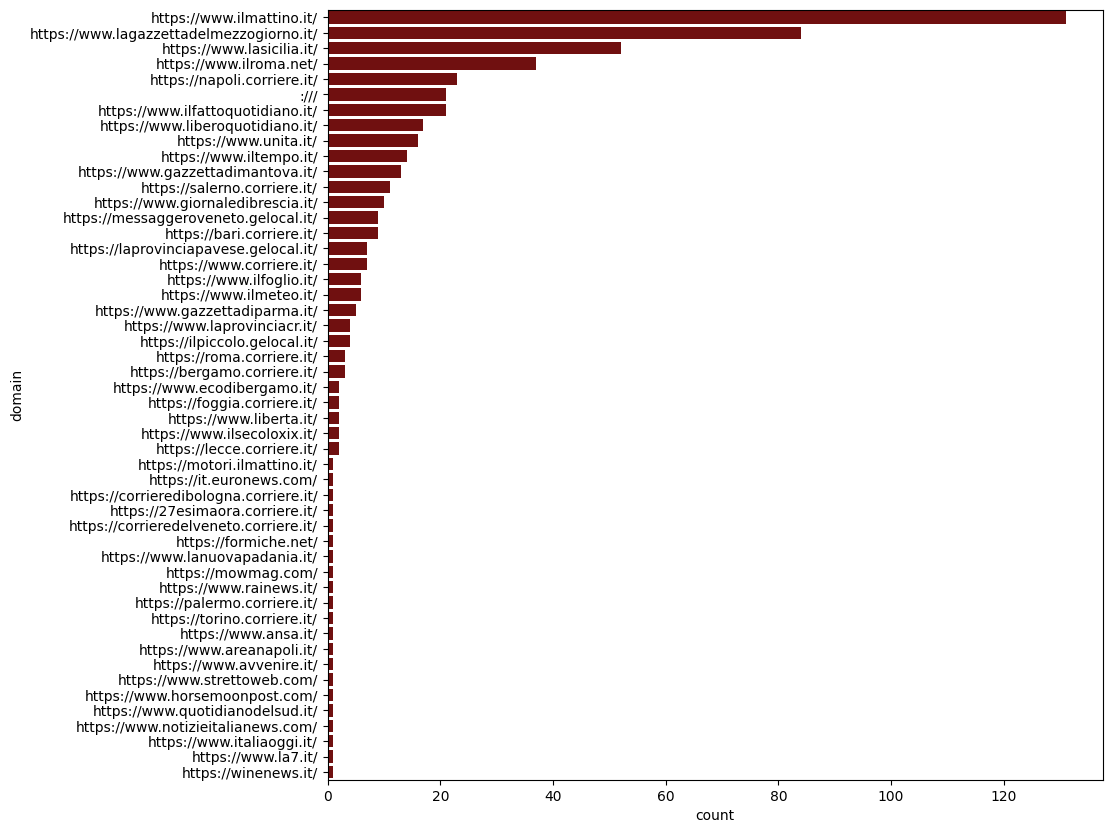

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 10,10
large_to_small = df.groupby('domain').size().sort_values().index[::-1]
domains_plot = sns.countplot(df['domain'], order=large_to_small, color = "maroon")

<Axes: xlabel='textlen', ylabel='Count'>

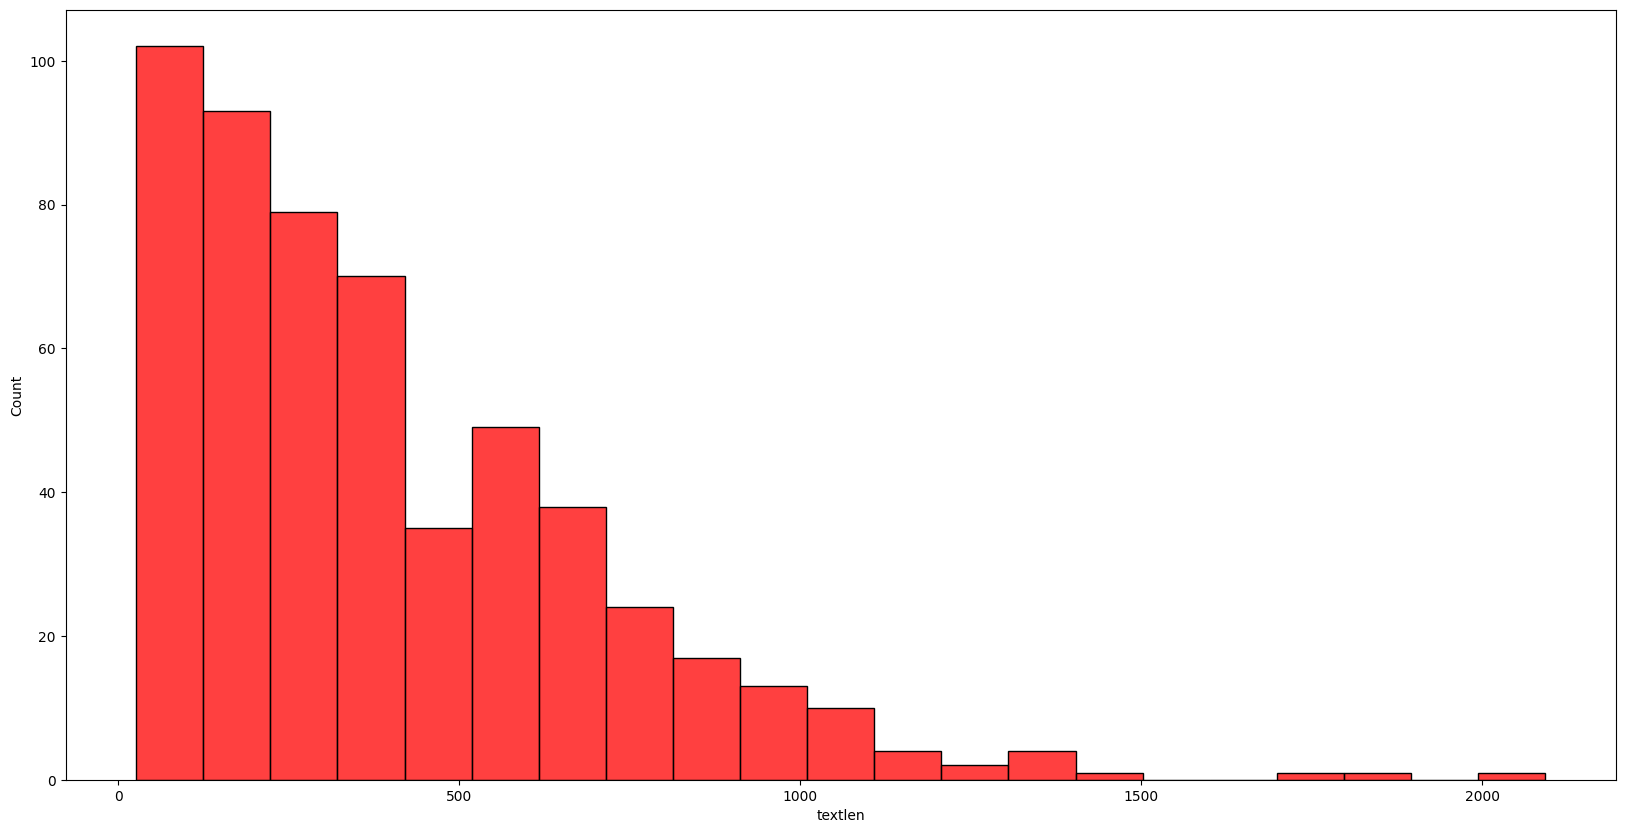

In [ ]:
sns.histplot(data=df, x="textlen", binwidth=100, color='red')


In [ ]:
df_positive=df[df['label']==1]
df_negative=df[df['label']==0]

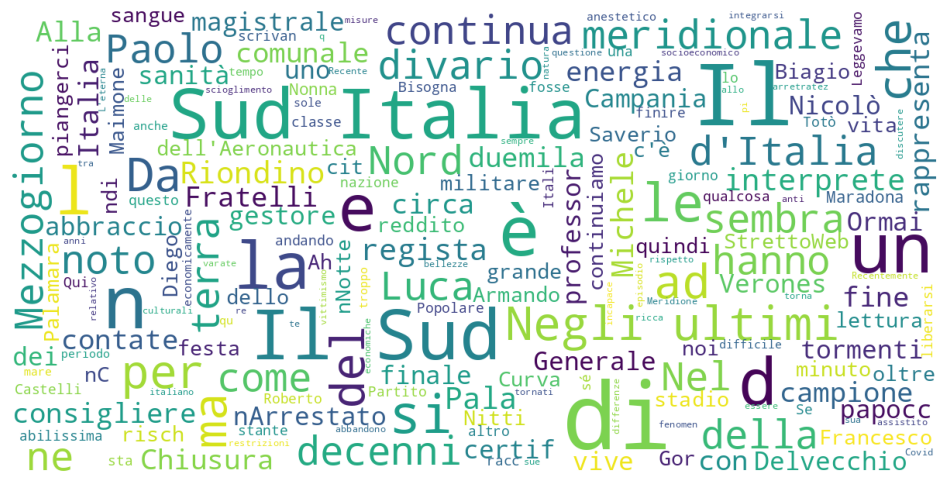

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

#show_wordcloud(df_negative['text'])
show_wordcloud(df_positive['text'])

In [ ]:
from nltk.tokenize import RegexpTokenizer


In [ ]:
# text_run='Ciao, che fai di bello oggi? Più tardi ti va se andiamo a prendere un caffè?'

In [ ]:
text_run=df['text'][0]

In [ ]:
tokenizer = RegexpTokenizer('\w+')
tokenizer_output = custom_tokenizer.tokenize(text_run)


In [ ]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('italian')
l=[]
for word in custom_tokenizer_output:
  l.append(stemmer.stem(word))
print(l)

['05', 'magg', '2024', 'a', 'a', 'a', 'forz', 'ital', 'cresc', 'nei', 'sondagg', 'e', 'si', 'dimostr', 'sexy', 'anton', 'tajan', 'lo', 'avev', 'dett', 'qualc', 'temp', 'fa', 'nel', 'part', 'eran', 'attes', 'div', 'ingress', 'compres', 'quell', 'di', 'alcun', 'esponent', 'pd', 'e', 'cos', 'è', 'stat', 'recent', 'il', 'passagg', 'con', 'gli', 'azzurr', 'di', 'giusepp', 'strang', 'ex', 'segretar', 'dem', 'di', 'regg', 'calabr', 'stand', 'ai', 'rumors', 'anche', 'l', 'ingress', 'di', 'giusepp', 'falcomat', 'ex', 'sindac', 'pd', 'sempr', 'di', 'regg', 'calabr', 'sarebb', 'imminent', 'cos', 'com', 'potrebber', 'entrar', 'nel', 'part', 'altri', 'esponent', 'di', 'spicc', 'dell', 'sinistr', 'a', 'livell', 'regional', 'ed', 'è', 'in', 'quest', 'contest', 'che', 'forz', 'ital', 'annunc', 'una', 'confert', 'stamp', 'per', 'present', 'alcun', 'nuov', 'adesion', 'al', 'part', 'la', 'confert', 'stamp', 'si', 'terr', 'doman', 'luned', '6', 'magg', 'alle', '15', 'nell', 'sal', 'collett', 'al', 'grupp'

In [ ]:
#unire tutti i file in un unico file di testo?

In [ ]:
# from collections import Counter
# d=Counter(l)
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def dict_contaparole(df):
  counter=Counter()
  tokenizer = RegexpTokenizer('\w+')
  stemmer = SnowballStemmer('italian')
  for i in range(len(df)):
    l=[]
    text=df['text'][i]
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('italian'))])
    tokenizer_output = tokenizer.tokenize(text)
    for word in tokenizer_output:
      l.append(stemmer.stem(word))
    counter.update(l)
  return dict(counter)

In [ ]:
d=dict_contaparole(df)

In [ ]:
df0=df[df['label']==0].reset_index(drop=True)
df1=df[df['label']==1].reset_index(drop=True)

In [ ]:
d0=dict_contaparole(df0)
d1=dict_contaparole(df1)

In [ ]:
a=sorted(d1, key=d1.get, reverse=True)[:50]
a

['l',
 'sud',
 'ital',
 'dell',
 'meridional',
 'part',
 'la',
 'è',
 'all',
 'nord',
 'sol',
 'il',
 'prim',
 'propr',
 'napol',
 'd',
 'stat',
 'mezzogiorn',
 'rispett',
 'e',
 'cos',
 'polit',
 'tutt',
 'paes',
 'anni',
 'ancor',
 'un',
 'ma',
 'region',
 'econom',
 'vot',
 'nell',
 'de',
 'fin',
 'social',
 'esser',
 'temp',
 'cultural',
 'pubblic',
 'molt',
 'quest',
 'sembr',
 'per',
 'non',
 'citt',
 'spess',
 'svilupp',
 'lavor',
 'rest',
 'due']